# **Описание работы:**
В данной работе, в учебных целях, исследуется набор данных "Отток клиентов банка" для анализа причин оттока клиентов и получения информации, которая поможет организации улучшить стратегии удержания клиентов. Понимание факторов, способствующих оттоку, имеет решающее значение для сохранения клиентов и поддержания прибыльности в долгосрочной перспективе.

**Основные этапы работы:**
* Загрузка и изучение структуры данных и их предварительная обработка.
* Исследовательский анализ данных (EDA): углубленный анализ набора данных, включая визуализации и статистические сводки, необходимые для получения представления о распределении и взаимосвязях между переменными.
* Интерпретация результатов исследования и подведение итогов: извлечение полезной информации из исследования и составление кратких, содержательных выводов.

### *Описание набора данных*

* RowNumber — Соответствует номеру (индексу) строки и не влияет на результат исследований.
* CustomerId — Содержит уникальный идентификатор клиента банка и не влияет на результат исследований.
* Surname — Полное имя клиента.
* CreditScore — Кредитный рейтинг клиента.
* Geography — Местоположение клиента.
* Gender — Пол клиента.
* Age — Возраст клиента.
* Tenure — Количество лет, в течение которых человек является клиентом банка.
* Balance — Остаток (текущий баланс) средств на счете клиента. Валюта - предположительно, Eвро (знак валюты - €).
* NumOfProducts — Количество продуктов, которые приобрел клиент.
* HasCrCard — Указывает, есть ли у клиента банка кредитная карта.
* IsActiveMember — Критерий, указывающий, является ли человек "активным клиентом".
* EstimatedSalary — Уровень заработной платы клиента (Eвро/год).
* Exited — Критерий, указывающий, является ли человек, в настоящее время, клиентом банка.
* Complain — Указывает, есть ли жалоба у клиента.
* Satisfaction Score — Оценка качества обслуживания, предоставленная клиентом.
* Card Type — Тип дебетовой карты клиента.
* Points Earned — Накопительный баллы (бонусы), заработанные клиентом.


# *Загрузка и изучение структуры данных и их предварительная обработка*

In [119]:
import numpy as np                 # Импорт библиотеки NumPy
import pandas as pd                # Импорт библиотеки Pandas
import seaborn as sns              # Импорт библиотеки SeaBorn
import matplotlib.pyplot as plt    # Импорт библиотеки MatPlotLib
from scipy import stats            # Импорт модуля stats из библиотеки Scipy
%matplotlib inline                 
                                   # Строка для отображения графиков в текущем ноутбуке.

plt.style.use('bmh')               # Устанавлием стиль графиков (Bayesian Methods for Hackers) по умолчанию

In [120]:
df = pd.read_csv('/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv')   # Создание датафрейма
df.head(5)                                                                         # Отображение нескольких строк датафрейма

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [121]:
df.info()    # Просмотр структуры датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [122]:
df.isna().mean()   # Убеждаемся в отсутствии пустых значений в строках

RowNumber             0.0
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64

In [123]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)     # Удаление столбцов, не влияющих на исследование

df_only_numeric = df.drop(['Geography','Card Type'],axis = 1)    # Создание датафрейма только с числовыми типами данных

df_only_numeric.loc[df['Gender'] == 'Male', 'Gender'] = 1        # Изменение значения 'Male' на значения '1'
df_only_numeric.loc[df['Gender'] == 'Female', 'Gender'] = 0      # Изменение значения 'Female' на значения '0'

df_only_numeric = df_only_numeric.astype({'Gender':int})         # Преобразование строкового типа данных в числовой

df_boolean = df.astype({'HasCrCard': bool, 'IsActiveMember': bool, 'Exited': bool, 'Complain':bool})    # Преобразование числового типа данных в логический

Датафрейм - df_only_numeric удобен для применения некоторых методов, таких как - describe() и corr() и т.п., которые будут использованы в дальнейшем исследовании.
В датафрейме - df_boolean изменяем числовые значения 1 и 0 на логические True и False соответственно.  

# *Исследовательский анализ данных*

In [124]:
df_only_numeric.describe()    # Просмотр статистистических данных

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106267,-0.106287,0.000242,-0.013225
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515
Exited,-0.026771,-0.106267,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628


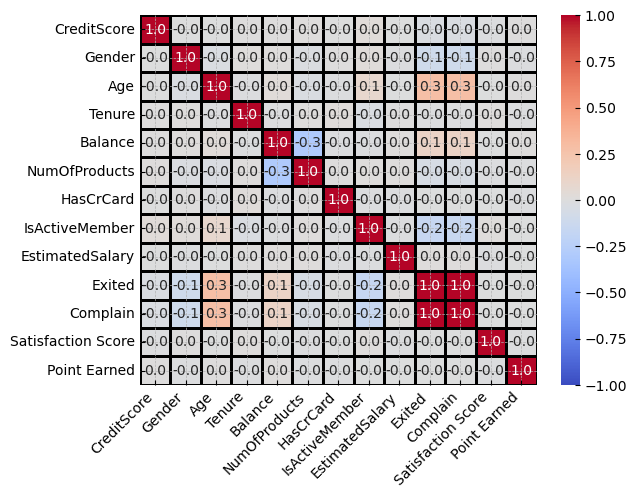

In [125]:
df_matrix = df_only_numeric.corr()    # Присваивание имени корреляционной матрице
display(df_matrix)                    # Отображение матрицы в виде таблицы
sns.heatmap(df_matrix, annot = True, fmt='.1f',vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black',xticklabels=df_matrix.columns)
plt.xticks(rotation=45, ha="right")
plt.show()                            # Визуализация матрицы корреляции

Данная матрица показывает существование линейных связей между переменными. Как видно, наиболее сильная связь (линейная зависимость) между столбцами 'Exited' и 'Complain'.

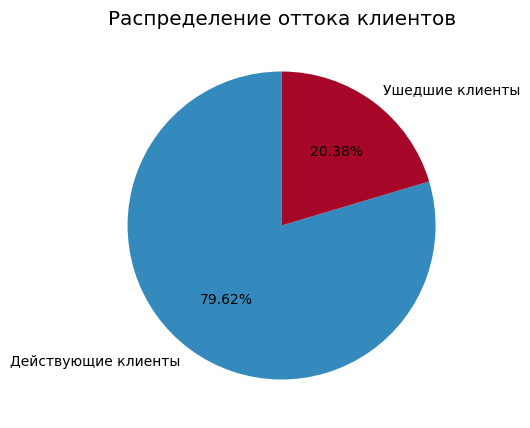

False    7962
True     2038
Name: Exited, dtype: int64

In [126]:
plt.figure(figsize=(5, 5))                                                                                                  # Задаем размеры диаграммы

plt.pie(df['Exited'].value_counts(), labels=['Действующие клиенты', 'Ушедшие клиенты'], autopct='%1.2f%%', startangle=90)   # Создание круговой диаграммы
plt.title('Распределение оттока клиентов')                                                                                  # Назначаем название диаграммы
plt.show() 

display(df_boolean['Exited'].value_counts())                                                                                # Подсчет действующих и ушедших клиетов банка и отображение в виде таблицы

В итоге имеем - 20,38% ушедших клиентов (2038 из 10000) и 79,62% действующих (7962 из 10000). Начнем исследование зависимостей оттока клиентов по порядку, начиная с первого стоблца датафрейма (CreditScore).

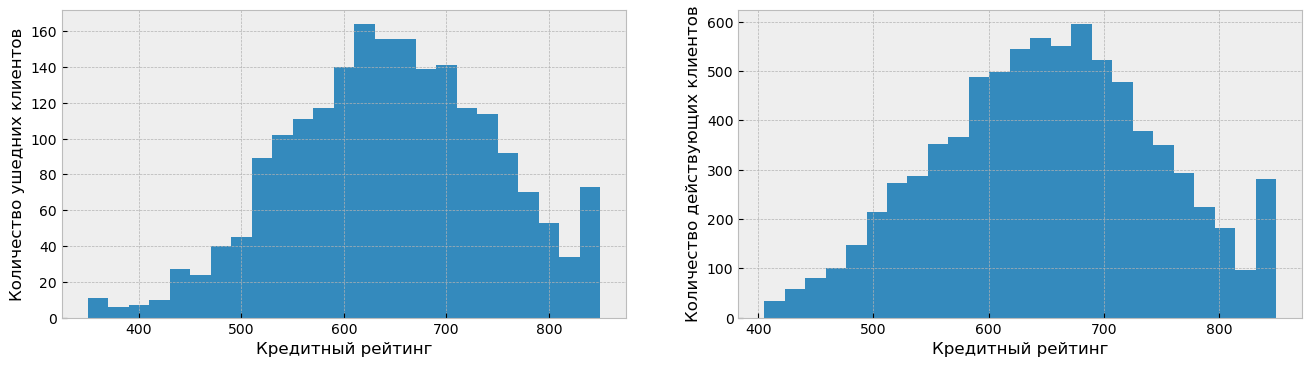

,Age_range,count,mean,median
0,"(17, 25]",46,647.021739,648.0
1,"(25, 35]",301,651.019934,652.0
2,"(35, 45]",734,644.516349,647.0
3,"(45, 60]",842,644.248219,644.0
4,"(60, 92]",115,644.373913,633.0


,Age_range,count,mean,median
0,"(17, 25]",565,651.499115,655.0
1,"(25, 35]",3241,650.447393,652.0
2,"(35, 45]",3002,653.482012,655.0
3,"(45, 60]",805,648.913043,650.0
4,"(60, 92]",349,657.902579,656.0


In [127]:
df_boolean['Age_range'] = df['Age_range'] = pd.cut(df['Age'],bins=[17,25,35,45,60,92])    # Создание столбцов в датафреймах с диапазоном возраста клиентов (Границы диапазов установлены согласно мин и макс значениям).

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))                               # Задаем расположение и размеры графиков на графической сетке

df_boolean.query("Exited == True")['CreditScore'].hist(ax=axes[0], bins = 25)             # Создание гистограммы ушедших клиентов и их кредитного рейтинга
axes[0].set_xlabel('Кредитный рейтинг')                                                   # Задаем название оси x
axes[0].set_ylabel('Количество ушедних клиентов')                                         # Задаем название оси y

df_boolean.query("Exited == False")['CreditScore'].hist(ax=axes[1], bins = 25)            # Создание гистограммы действующих клиентов и их кредитного рейтинга
axes[1].set_xlabel('Кредитный рейтинг')
axes[1].set_ylabel('Количество действующих клиентов')
plt.show()

display(df_boolean.query("Exited == True").groupby('Age_range')['CreditScore'].agg(['count','mean','median']).reset_index())     # Подсчет ушедших клиентов, среднего значение и медианы их кредитного рейтинга
display(df_boolean.query("Exited == False").groupby('Age_range')['CreditScore'].agg(['count','mean','median']).reset_index())    # Подсчет действующих клиентов, среднего значение и медианы их кредитного рейтинга

Как видно, различия кредитного рейтинга между ушедшими и действующими клиентами практически отсутствуют. Следовательно, кредитный рейтинг не оказывает какого - либо существенного влияния на отток клиентов.

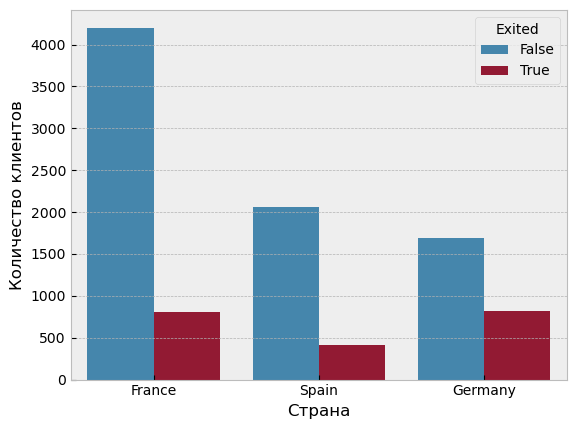

,Geography,count,mean,exited_clients
1,Germany,2509,0.324432,814.0
0,France,5014,0.161747,811.0
2,Spain,2477,0.166734,413.0


In [128]:
sns.countplot(x='Geography', hue='Exited', data=df_boolean)                                  # Создание столбчатого графика по странам
plt.xlabel('Страна')
plt.ylabel('Количество клиентов')
plt.show()
 
df_country = df.groupby('Geography')['Exited'].agg(['count','mean']).reset_index()           # Создание датафрейма с группировкой по странам
df_country = df_country.assign(exited_clients = df_country['count'] * df_country['mean'])    # Добавление столбца с подсчетом ушедших клиентов для каждой страны
display(df_country.sort_values(by = 'exited_clients', ascending = False))                    # Сортировка столбца 'exited_clients' по убыванию

Согласно этому набору данных, можно сделать следующие выводы:
* Наибольший отток клиентов наблюдается в Германии - 32,44% (814 из 2509 клиентов)
* В оставшихся странах доля оттока клиентов приблизительно равна - 16,67% для Испании (413 из 2477 клиентов) и 16,17% для Франции (811 из 5014 клиентов)

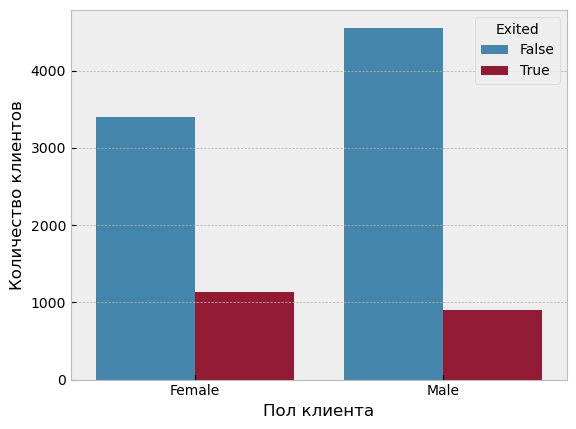

,Gender,count,mean,exited_clients
0,Female,4543,0.250715,1139.0
1,Male,5457,0.164743,899.0


In [129]:
sns.countplot(x='Gender', hue='Exited', data=df_boolean)                                 # Создание столбчатого графика по полу
plt.xlabel('Пол клиента')
plt.ylabel('Количество клиентов')
plt.show()

df_gender = df.groupby('Gender')['Exited'].agg(['count','mean']).reset_index()           # Создание датафрейма с группировкой по полу
df_gender = df_gender.assign(exited_clients = df_gender['count'] * df_gender['mean'])    # Добавление столбца с подсчетом ушедших клиентов для каждого пола
display(df_gender)

Согласно этому набору данных, можно сделать следующие выводы:
* Наибольший отток наблюдается у клиентов-женщин  - 25,07% (1139 из 4543 клиентов)
* У мужчин доля ушедших клиентов равна - 16,47% (899 из 5457 клиентов)

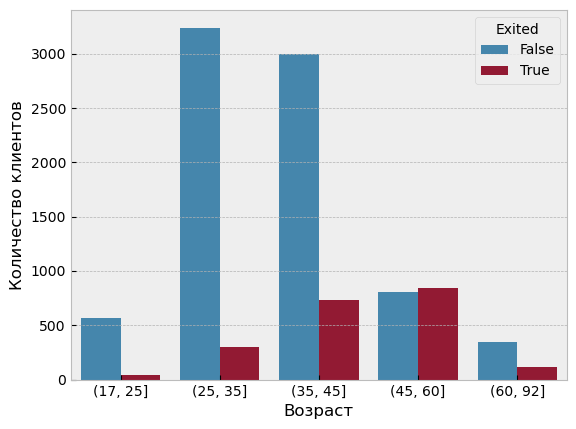

,Age_range,count,mean,exited_clients,exited_clients_male,exited_clients_female
0,"(17, 25]",611,0.075286,46.0,19.0,27.0
1,"(25, 35]",3542,0.084980,301.0,125.0,176.0
2,"(35, 45]",3736,0.196467,734.0,333.0,401.0
3,"(45, 60]",1647,0.511233,842.0,371.0,471.0
4,"(60, 92]",464,0.247845,115.0,51.0,64.0


In [130]:
sns.countplot(x='Age_range', hue='Exited', data=df_boolean)                                                                # Создание столбчатого графика по диапазону возрастов
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

df_Age_range = df_boolean.groupby('Age_range')['Exited'].agg(['count','mean']).reset_index()                               # Создание датафрейма с группировкой по диапазону возрастов
df_Age_range_male = df.query('Gender == "Male"').groupby('Age_range')['Exited'].agg(['count','mean']).reset_index()        # Создание датафрейма с группировкой по диапазону возрастов для клиентов - мужчин
df_Age_range_female = df.query('Gender == "Female"').groupby('Age_range')['Exited'].agg(['count','mean']).reset_index()    # Создание датафрейма с группировкой по диапазону возрастов для клиентов - женщин

df_Age_range = df_Age_range.assign(exited_clients = df_Age_range['count'] * df_Age_range['mean'])                          # Добавление столбца с подсчетом ушедших клиентов
df_Age_range = df_Age_range.assign(exited_clients_male = df_Age_range_male['count'] * df_Age_range_male['mean'])           # Добавление столбца с подсчетом ушедших клиентов - мужчин
df_Age_range = df_Age_range.assign(exited_clients_female = df_Age_range_female['count'] * df_Age_range_female['mean'])     # Добавление столбца с подсчетом ушедших клиентов - женщин
display(df_Age_range)

Согласно этому набору данных, можно сделать следующие выводы:
* Наибольший отток наблюдается у клиентов в возрасте от 46 до 60 лет  - 51,12% (842 из 1647 клиентов)
* Заметен рост оттока клиентов при переходе к все более возрастным группам (до 60 лет). Далее доля оттока уменьшается.
* Учитывая долю оттока и количество клиентов для каждой возрастной группы, можно утверждать, что наиболее предпочтительным клиентов для банка является мужчина в возрасте от 26 до 35 лет включительно.

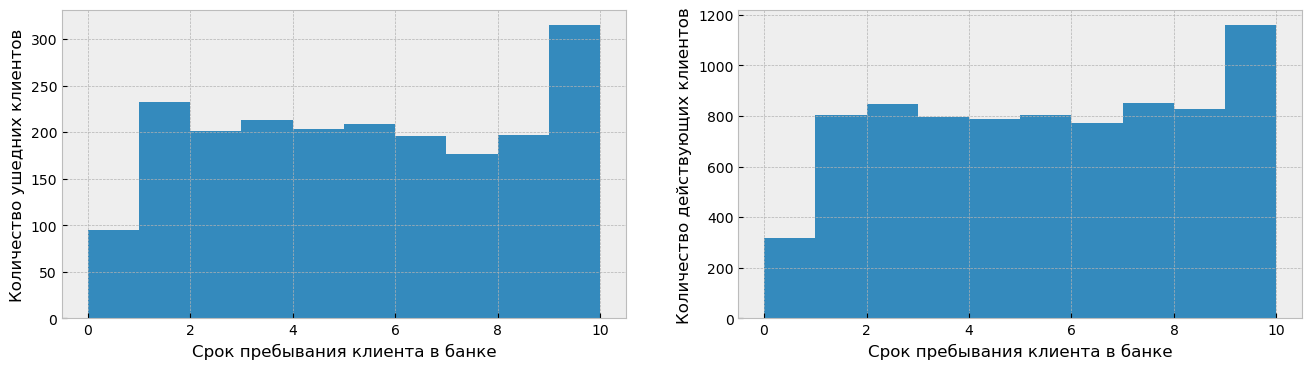

,Age_range,count,mean
0,"(17, 25]",46,5.086957
1,"(25, 35]",301,4.983389
2,"(35, 45]",734,4.980926
3,"(45, 60]",842,4.896675
4,"(60, 92]",115,4.730435


,Age_range,count,mean
0,"(17, 25]",565,5.196460
1,"(25, 35]",3241,5.029620
2,"(35, 45]",3002,4.992338
3,"(45, 60]",805,5.111801
4,"(60, 92]",349,4.962751


In [131]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

df_boolean.query("Exited == True")['Tenure'].hist(ax=axes[0])    # Создание гистограммы ушедших клиентов и их срока пребывания в банке
axes[0].set_xlabel('Срок пребывания клиента в банке')
axes[0].set_ylabel('Количество ушедних клиентов')

df_boolean.query("Exited == False")['Tenure'].hist(ax=axes[1])   # Создание гистограммы действующих клиентов и их срока пребывания в банке
axes[1].set_xlabel('Срок пребывания клиента в банке')
axes[1].set_ylabel('Количество действующих клиентов')
plt.show()

display(df_boolean.query("Exited == True").groupby('Age_range')['Tenure'].agg(['count','mean']).reset_index())     # Подсчет ушедших клиентов и среднего значение их срока пребывания в банке
display(df_boolean.query("Exited == False").groupby('Age_range')['Tenure'].agg(['count','mean']).reset_index())    # Подсчет действующих клиентов и среднего значение их срока пребывания в банке

Как видно, различия срока пребывание в качестве клиента банка между ушедшими и действующими клиентами практически отсутствуют. Следовательно, срок пребывания в банке не оказывает какого - либо существенного влияния на отток клиентов.

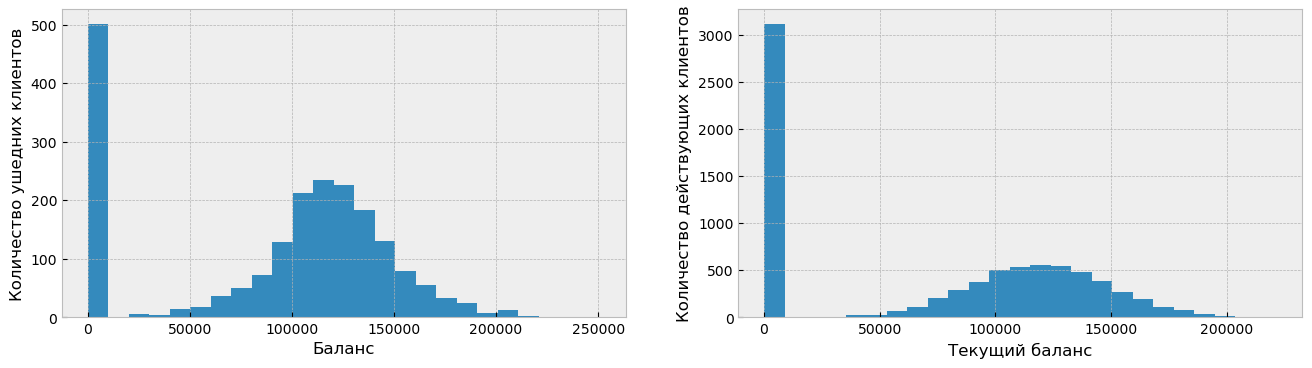

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

df_boolean.query("Exited == True")['Balance'].hist(ax=axes[0],bins = 25)    # Создание гистограммы ушедших клиентов и их баланса
axes[0].set_xlabel('Баланс')            
axes[0].set_ylabel('Количество ушедних клиентов')                

df_boolean.query("Exited == False")['Balance'].hist(ax=axes[1], bins = 25)   # Создание гистограммы действующих клиентов и их текущего баланса
axes[1].set_xlabel('Текущий баланс')
axes[1].set_ylabel('Количество действующих клиентов')
plt.show()

Теперь посмотрим на аналогичное распределение у клиентов с балансом строго больше нуля.

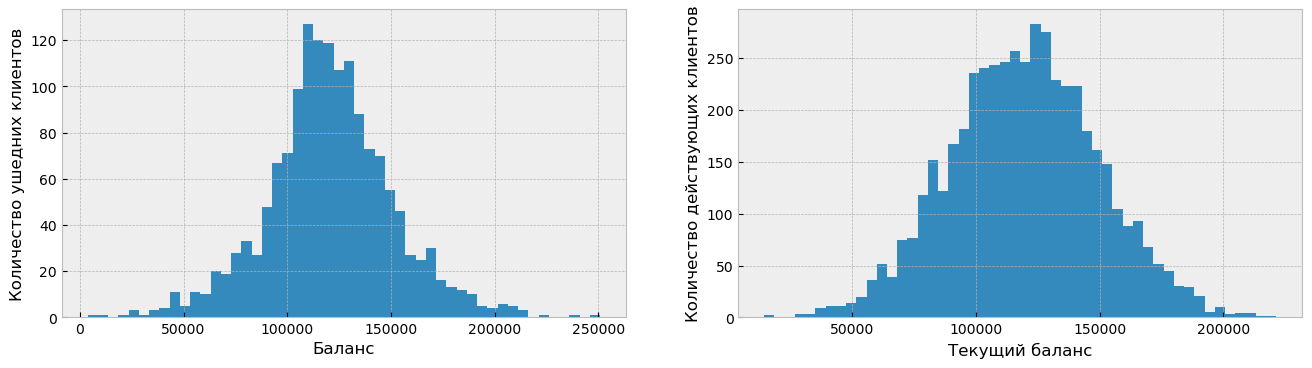

In [133]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

df_boolean.query("Exited == True and Balance > 0")['Balance'].hist(ax=axes[0],bins = 50)
axes[0].set_xlabel('Баланс')            
axes[0].set_ylabel('Количество ушедних клиентов')                

df_boolean.query("Exited == False and Balance > 0")['Balance'].hist(ax=axes[1], bins = 50)
axes[1].set_xlabel('Текущий баланс')
axes[1].set_ylabel('Количество действующих клиентов')
plt.show()

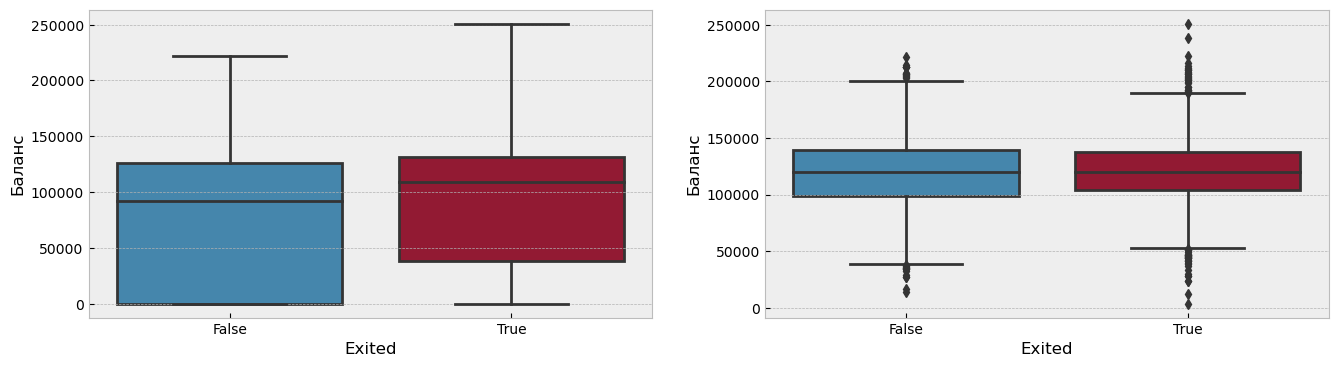

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

sns.boxplot(x='Exited', y='Balance', data=df_boolean,ax=axes[0])                         # Построение диаграммы распределения баланса у клиентов        
axes[0].set_ylabel('Баланс')

sns.boxplot(x='Exited', y='Balance', data=df_boolean.query('Balance > 0'),ax=axes[1])    # Построение диаграммы распределения баланса у клиентов, где баланс строго больше нуля       
axes[1].set_ylabel('Баланс')

plt.show()

In [135]:
display(df_only_numeric.query('Balance == 0')['Exited'].agg(['count','mean']).reset_index())    # Подсчет клиентов с нулевым балансом и доли ушедших клиентов
display(df_only_numeric.query('Balance > 0')['Exited'].agg(['count','mean']).reset_index())     # Подсчет клиентов с балансом строго больше нуля и доли ушедших клиентов

,index,Exited
0,count,3617.000000
1,mean,0.138236


,index,Exited
0,count,6383.000000
1,mean,0.240953


Согласно этому набору данных, можно сделать следующие выводы:
* Распределение баланса не показывает четкого различия между ушедшими и действующими клиентами
* Доля ушедших клиентов с нулевым балансом в 1,74 раза меньше (24,1% / 13,8), чем доля ушедших клиентов с балансом строго больше нуля

Text(0, 0.5, 'Количество клиентов')

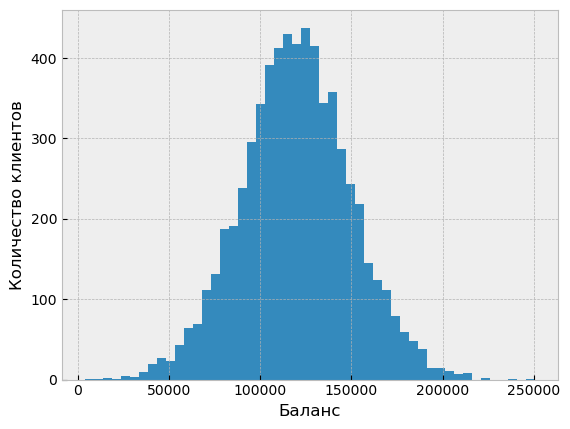

In [136]:
df.query('Balance > 0')['Balance'].hist(bins = 50)    # Создание гистограммы для клиентов, у которых баланс строго больше нуля
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')

На данной гистограмме распределение значений стремится к нормальному. Убедимся в этом наверняка.

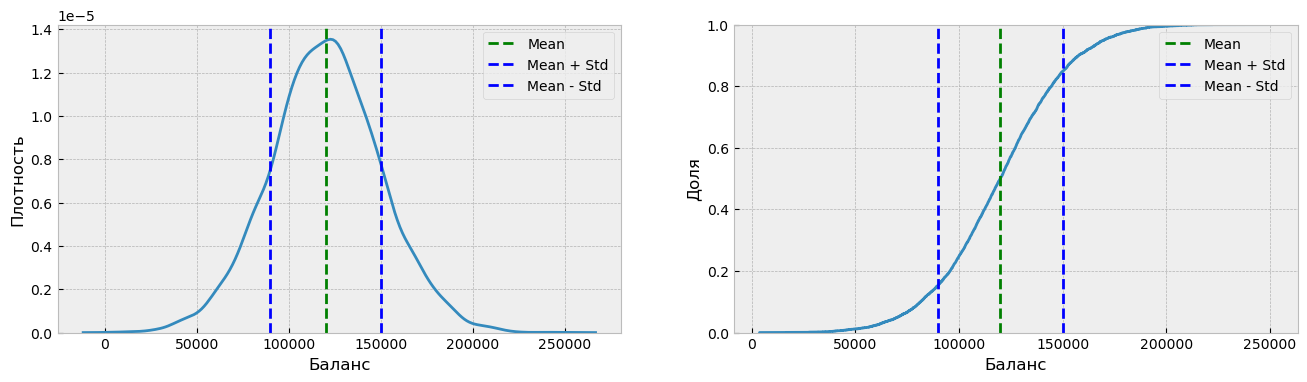

In [137]:
df_balance_normal_dist = df.query('Balance > 0')['Balance']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

mean = df_balance_normal_dist.mean()                                          # Находим среднее значения баланса
std = df_balance_normal_dist.std()                                            # Находим среднеквадратичное отклонение баланса

sns.kdeplot(df_balance_normal_dist,ax=axes[0])                                # Создание графика плотности распределения (PDF)
axes[0].set_xlabel('Баланс')            
axes[0].set_ylabel('Плотность')
axes[0].axvline(mean, color='g', linestyle='--', label='Mean')                # Определение параметров линии среднего значения на графике
axes[0].axvline(mean + std, color='b', linestyle='--', label='Mean + Std')    # Определение параметров линии среднеквадратичного отклонение на графике
axes[0].axvline(mean - std, color='b', linestyle='--', label='Mean - Std')    
axes[0].legend()                                                              # Отображение легенды на графике

sns.ecdfplot(df_balance_normal_dist,ax=axes[1])                               # Создание графика функции распределения (CDF)
axes[1].set_xlabel('Баланс')            
axes[1].set_ylabel('Доля')
axes[1].axvline(mean, color='g', linestyle='--', label='Mean')
axes[1].axvline(mean + std, color='b', linestyle='--', label='Mean + Std')
axes[1].axvline(mean - std, color='b', linestyle='--', label='Mean - Std')
axes[1].legend()

plt.show()

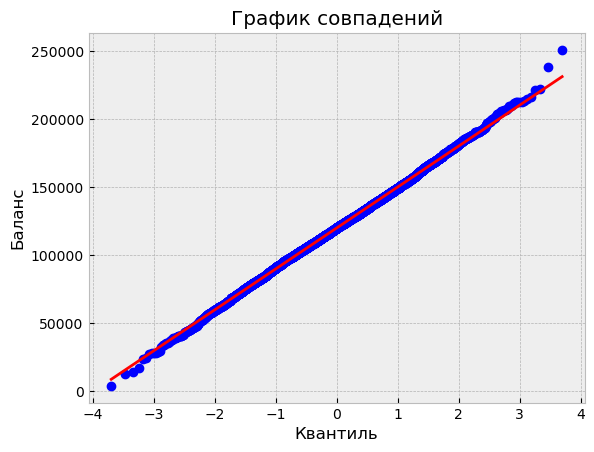

In [138]:
stats.probplot(df_balance_normal_dist,dist='norm',plot=plt)    # Строим график совпадения выборочных значений по отношению квантилям заданного теоретического распеделения
plt.xlabel('Квантиль')
plt.ylabel('Баланс')
plt.title('График совпадений')
plt.show()

В итоге можно утверждать, что баланс клиентов со значениями строго больше нуля имеет нормальное распределение.

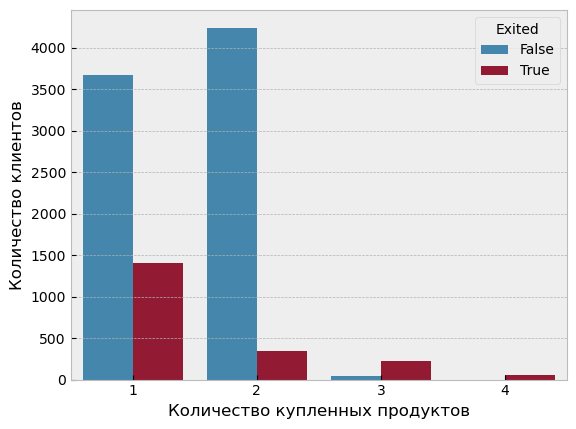

,NumOfProducts,count,mean,exited_clients
0,1,5084,0.277144,1409.0
1,2,4590,0.076035,349.0
2,3,266,0.827068,220.0
3,4,60,1.000000,60.0


In [139]:
sns.countplot(x='NumOfProducts', hue='Exited', data=df_boolean)                                    # Создание столбчатого графика по количеству купленных продуктов     
plt.xlabel('Количество купленных продуктов')
plt.ylabel('Количество клиентов')
plt.show()

df_products = df_boolean.groupby('NumOfProducts')['Exited'].agg(['count','mean']).reset_index()    # Создание датафрейма с группировкой по количеству купленных продуктов
df_products = df_products.assign(exited_clients = df_products['count'] * df_products['mean'])      # Добавление столбца с подсчетом ушедших клиентов
display(df_products)

Согласно этому набору данных, можно сделать следующие выводы:
* Большая часть клиентов купившая более 2 продуктов ушла из банка (82,7% для 3 продуктов и 100% для 4 продуктов), но стоит заметить, что суммарное количество ушедших составляет всего 280 из 2038 (13,7%) клиентов покинувших банк.
* Наибольшое количество ушедших клиентов имели всего один купленный продукт - 27,7% (1409 из 5084 клиентов)

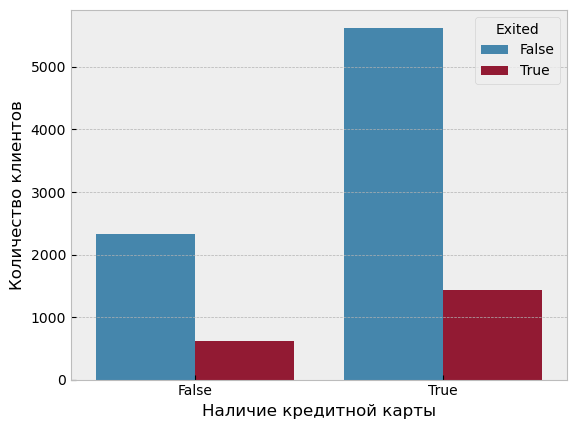

,HasCrCard,count,mean,exited_clients
1,True,7055,0.201984,1425.0
0,False,2945,0.208149,613.0


In [140]:
sns.countplot(x='HasCrCard', hue='Exited', data=df_boolean)                                # Создание столбчатого графика по наличию кредитной карты
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Количество клиентов')
plt.show()

df_card = df_boolean.groupby('HasCrCard')['Exited'].agg(['count','mean']).reset_index()    # Создание датафрейма с группировкой по наличию кредитной карты
df_card = df_card.assign(exited_clients = df_card['count'] * df_card['mean'])              # Добавление столбца с подсчетом ушедших клиентов
display(df_card.sort_values(by = 'exited_clients', ascending = False))

Как видно, доля ушедших клиентов между клиентами с кредитной картой и без нее практически равна (~20%). Следовательно, наличие кредитной карты не оказывает какого - либо существенного влияния на отток клиентов.

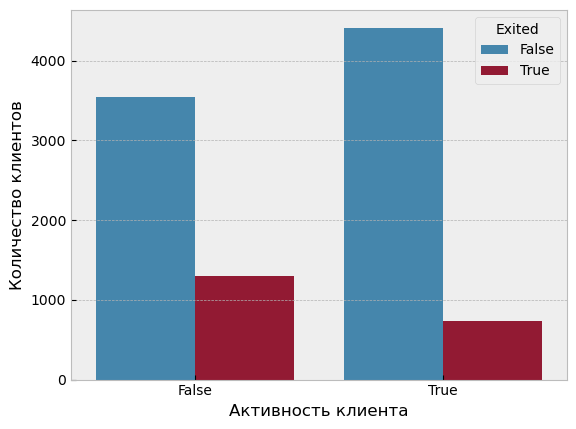

,IsActiveMember,count,mean,exited_clients
0,False,4849,0.268715,1303.0
1,True,5151,0.142691,735.0


In [141]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df_boolean)                                  # Создание столбчатого графика по активности клиента
plt.xlabel('Активность клиента')
plt.ylabel('Количество клиентов')
plt.show()

df_active = df_boolean.groupby('IsActiveMember')['Exited'].agg(['count','mean']).reset_index()    # Создание датафрейма с группировкой по активности клиента
df_active = df_active.assign(exited_clients = df_active['count'] * df_active['mean'])             # Добавление столбца с подсчетом ушедших клиентов
display(df_active.sort_values(by = 'exited_clients', ascending = False))

Согласно этому набору данных, можно сделать следующие выводы:
* Менее активные клиенты чаще уходят из банка - 26,87% (1303 из 4849 клиентов)
* Доля ушедших активных клиентов заметно меньше - 14,27% (735 из 5151 клиента)

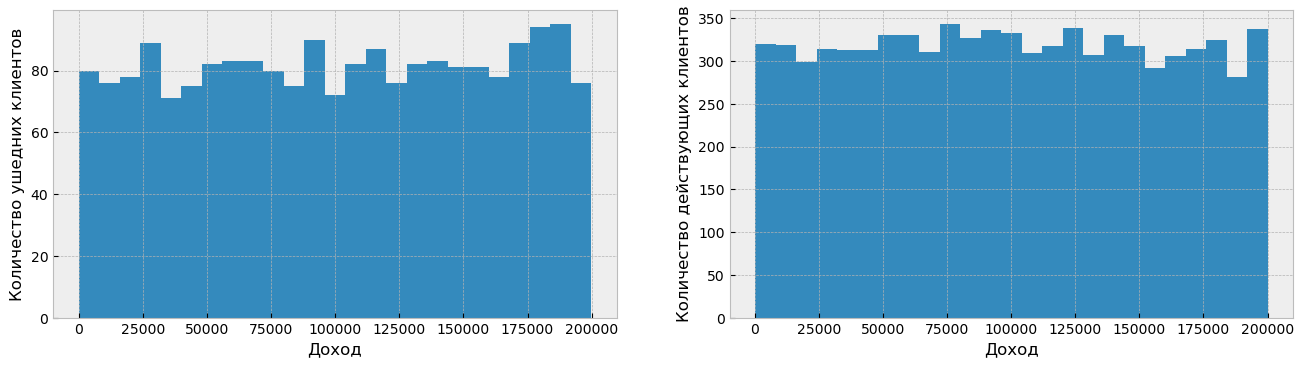

,Age_range,count,mean,median
0,"(17, 25]",46,105665.190652,106560.285
1,"(25, 35]",301,100596.141960,100442.220
2,"(35, 45]",734,100443.322084,101365.870
3,"(45, 60]",842,102740.210214,103756.850
4,"(60, 92]",115,100039.140783,106826.920


,Age_range,count,mean,median
0,"(17, 25]",565,101803.137221,104170.480
1,"(25, 35]",3241,99653.004860,100556.980
2,"(35, 45]",3002,100335.830163,99623.705
3,"(45, 60]",805,97263.149578,93503.020
4,"(60, 92]",349,97495.833438,94677.830


In [142]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

df_boolean.query("Exited == True")['EstimatedSalary'].hist(ax=axes[0],bins = 25)     # Создание гистограммы ушедших клиентов и их заработной платы
axes[0].set_xlabel('Доход')            
axes[0].set_ylabel('Количество ушедних клиентов')                

df_boolean.query("Exited == False")['EstimatedSalary'].hist(ax=axes[1], bins = 25)   # Создание гистограммы действующих клиентов и их заработной платы
axes[1].set_xlabel('Доход')
axes[1].set_ylabel('Количество действующих клиентов')
plt.show()

display(df_boolean.query("Exited == True").groupby('Age_range')['EstimatedSalary'].agg(['count','mean','median']).reset_index())     # Подсчет ушедших клиентов, среднего значение и медианы их заработной платы
display(df_boolean.query("Exited == False").groupby('Age_range')['EstimatedSalary'].agg(['count','mean','median']).reset_index())    # Подсчет действующих клиентов, среднего значение и медианы их заработной платы

Как видно, различия заработной платы между ушедшими и действующими клиентами практически отсутствуют. Следовательно, заработная плата не оказывает какого - либо существенного влияния на отток клиентов.

Text(0, 0.5, 'Количество клиентов')

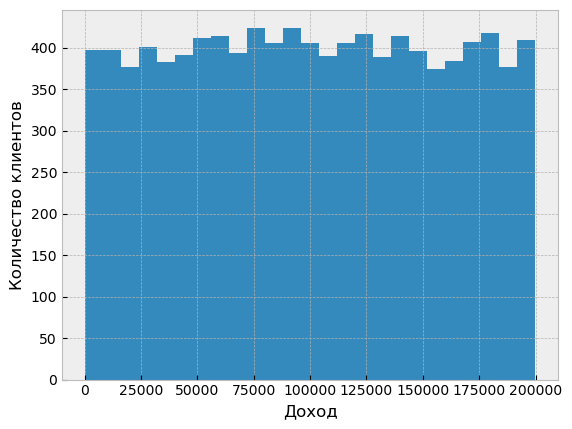

In [143]:
df['EstimatedSalary'].hist(bins = 25)    # Создание гистограммы клиентов и их заработной платы
plt.xlabel('Доход')
plt.ylabel('Количество клиентов')

На данной гистограмме распределение значений стремится к равномерному. Убедимся в этом наверняка.

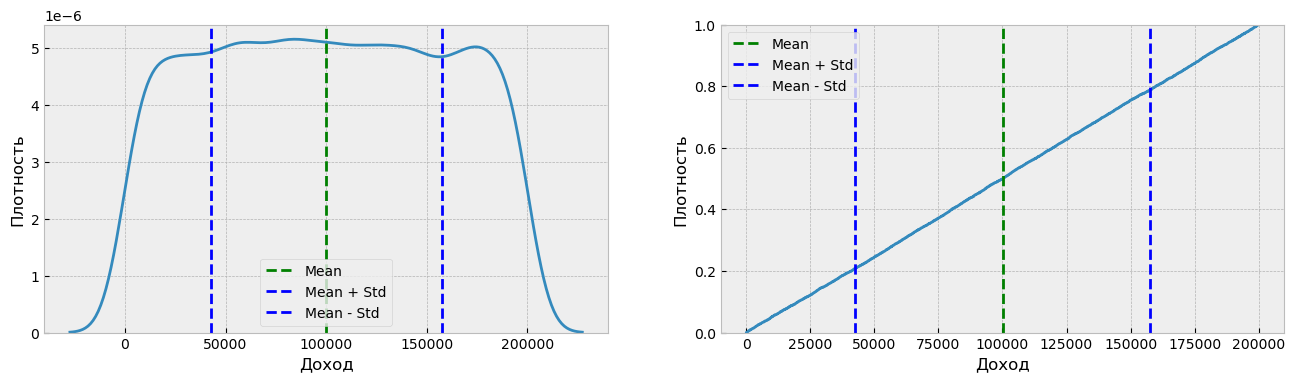

In [144]:
df_salary_uniform_dist = df['EstimatedSalary']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

sns.kdeplot(df_salary_uniform_dist,ax=axes[0])

mean = df_salary_uniform_dist.mean()
std = df_salary_uniform_dist.std()

axes[0].set_xlabel('Доход')            
axes[0].set_ylabel('Плотность')
axes[0].axvline(mean, color='g', linestyle='--', label='Mean')
axes[0].axvline(mean + std, color='b', linestyle='--', label='Mean + Std')
axes[0].axvline(mean - std, color='b', linestyle='--', label='Mean - Std')
axes[0].legend()

sns.ecdfplot(df_salary_uniform_dist,ax=axes[1])
axes[1].set_xlabel('Доход')            
axes[1].set_ylabel('Плотность')
axes[1].axvline(mean, color='g', linestyle='--', label='Mean')
axes[1].axvline(mean + std, color='b', linestyle='--', label='Mean + Std')
axes[1].axvline(mean - std, color='b', linestyle='--', label='Mean - Std')
axes[1].legend()

plt.show()

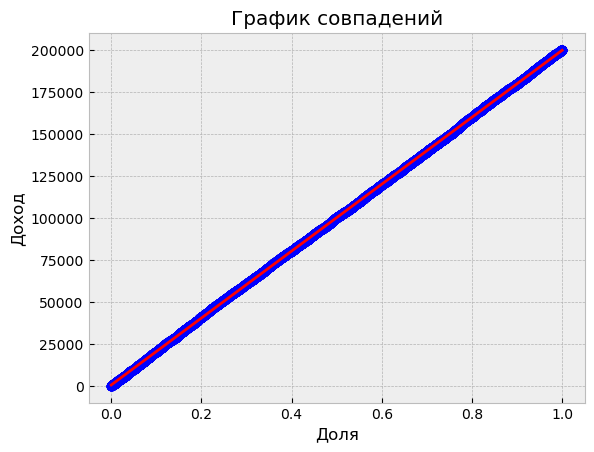

In [145]:
stats.probplot(df_salary_uniform_dist,dist='uniform',plot=plt)
plt.xlabel('Доля')
plt.ylabel('Доход')
plt.title('График совпадений')
plt.show()

В итоге можно утверждать, что заработная плата клиентов имеет равномерное распределение.

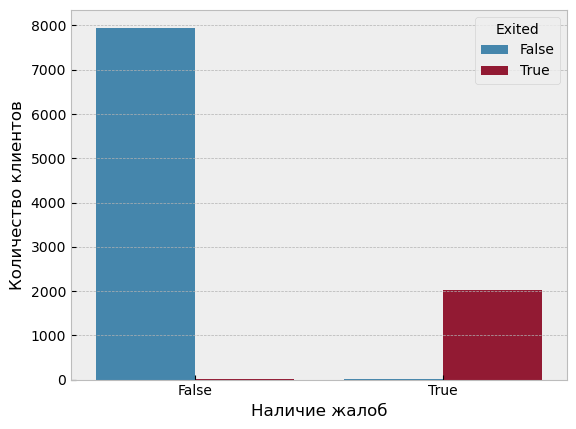

,Age_range,count,mean,complain_clients
0,"(17, 25]",46,1.000000,46.0
1,"(25, 35]",301,0.996678,300.0
2,"(35, 45]",734,0.998638,733.0
3,"(45, 60]",842,0.997625,840.0
4,"(60, 92]",115,1.000000,115.0


,Age_range,count,mean,complain_clients
0,"(17, 25]",565,0.000000,0.0
1,"(25, 35]",3241,0.001851,6.0
2,"(35, 45]",3002,0.001332,4.0
3,"(45, 60]",805,0.000000,0.0
4,"(60, 92]",349,0.000000,0.0


In [146]:
sns.countplot(x='Complain', hue='Exited', data=df_boolean)    # Создание столбчатого графика по наличию жалоб у клиента
plt.xlabel('Наличие жалоб')
plt.ylabel('Количество клиентов')
plt.show()
 
df_complain_true = df_boolean.query("Exited == True").groupby('Age_range')['Complain'].agg(['count','mean']).reset_index()
df_complain_false = df_boolean.query("Exited == False").groupby('Age_range')['Complain'].agg(['count','mean']).reset_index()

df_complain_true = df_complain_true.assign(complain_clients = df_complain_true['count'] * df_complain_true['mean'])
df_complain_false = df_complain_false.assign(complain_clients = df_complain_false['count'] * df_complain_false['mean']) 
display(df_complain_true)
display(df_complain_false) 

Согласно этому набору данных, можно сделать следующие выводы:
* Более 99,6% ушедших клиентов имели жалобы
* Менее 0,01% действующих клиентов имеют жалобы


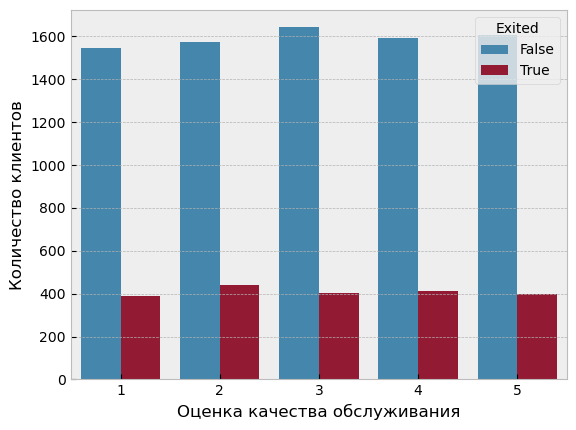

,Satisfaction Score,count,mean,exited_clients
0,1,1932,0.200311,387.0
1,2,2014,0.217974,439.0
2,3,2042,0.196376,401.0
3,4,2008,0.206175,414.0
4,5,2004,0.198104,397.0


In [147]:
sns.countplot(x='Satisfaction Score', hue='Exited', data=df_boolean)
plt.xlabel('Оценка качества обслуживания')
plt.ylabel('Количество клиентов')
plt.show()

df_score = df_boolean.groupby('Satisfaction Score')['Exited'].agg(['count','mean']).reset_index()    # Создание датафрейма с группировкой по оценке качества обслуживания
df_score = df_score.assign(exited_clients = df_score['count'] * df_score['mean'])
display(df_score)

Как видно выше, различия в качестве обслуживания между ушедшими и действующими клиентами практически отсутствуют. Следовательно, оценка качества обслуживания не оказывает какого - либо существенного влияния на отток клиентов.

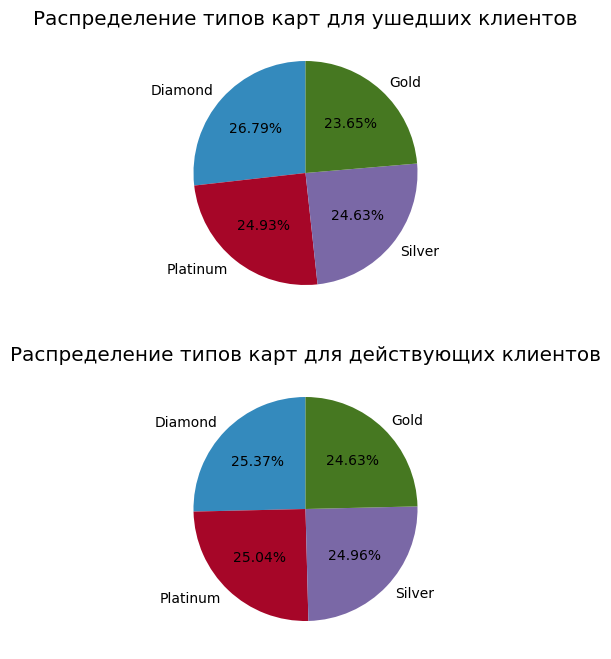

In [148]:
plt.figure(figsize=(8, 8))

plt.subplot(2,1,1)
plt.pie(df.query("Exited == True")['Card Type'].value_counts(), autopct='%1.2f%%', labels = ['Diamond', 'Platinum', 'Silver', 'Gold',], startangle=90)
plt.title('Распределение типов карт для ушедших клиентов')                                                                                  

plt.subplot(2,1,2)
plt.pie(df.query("Exited == False")['Card Type'].value_counts(), autopct='%1.2f%%', labels = ['Diamond', 'Platinum', 'Silver', 'Gold',], startangle=90)
plt.title('Распределение типов карт для действующих клиентов')

plt.show()
                                                           

Как видно выше, распределение карт между ушедшими и действующими клиентами схожи. Следовательно, тип карты не оказывает какого - либо существенного влияния на отток клиентов.

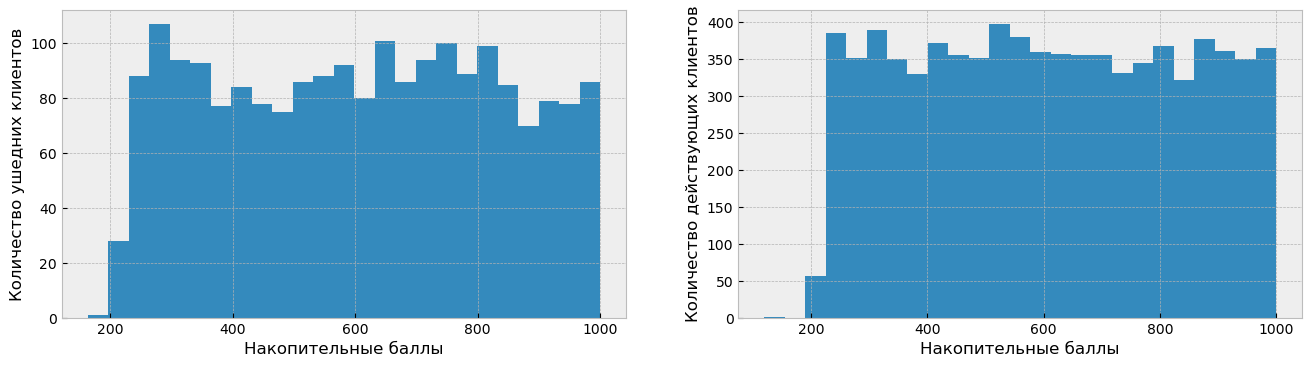

,Age_range,count,mean,median
0,"(17, 25]",46,653.304348,630.0
1,"(25, 35]",301,597.026578,586.0
2,"(35, 45]",734,602.055858,611.0
3,"(45, 60]",842,601.495249,604.5
4,"(60, 92]",115,641.226087,642.0


,Age_range,count,mean,median
0,"(17, 25]",565,606.621239,597.0
1,"(25, 35]",3241,607.650725,602.0
2,"(35, 45]",3002,604.633578,601.0
3,"(45, 60]",805,610.752795,621.0
4,"(60, 92]",349,614.275072,627.0


In [149]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

df_boolean.query("Exited == True")['Point Earned'].hist(ax=axes[0], bins = 25)    # Создание гистограммы ушедших клиентов и количество их бонусов
axes[0].set_xlabel('Накопительные баллы')                                                   
axes[0].set_ylabel('Количество ушедних клиентов')                                         

df_boolean.query("Exited == False")['Point Earned'].hist(ax=axes[1], bins = 25)   # Создание гистограммы действующих клиентов и количество их бонусов
axes[1].set_xlabel('Накопительные баллы')
axes[1].set_ylabel('Количество действующих клиентов')
plt.show()

display(df_boolean.query("Exited == True").groupby('Age_range')['Point Earned'].agg(['count','mean','median']).reset_index())     
display(df_boolean.query("Exited == False").groupby('Age_range')['Point Earned'].agg(['count','mean','median']).reset_index())    

Как видно выше, распределение баллов между ушедшими и действующими клиентами практически совпадает. Следовательно, накопительные баллы не оказывает какого - либо существенного влияния на отток клиентов.

# *Интерпретация результатов исследования и подведение итогов*

В ходе исследование установлено следующее:
* Географическое положение влияет на отток клиентов, причем распределение оттока варьируется в зависимостри от страны. Так, наибольший отток клиентов наблюдается в Германии - 32,44% (814 из 2509 клиентов). В оставшихся странах доля оттока клиентов приблизительно равна - 16,67% для Испании (413 из 2477 клиентов) и 16,17% для Франции (811 из 5014 клиентов).
* Пол клиента также имеет значение. Клиенты женского пола больше склонны к уходу из банка - 25,07% (1139 из 4543 клиентов). У мужчин доля ушедших клиентов равна - 16,47% (899 из 5457 клиентов).
* Для каждой возрастной группы своя доля оттока. Так, молодые клиенты менее склонны к уходу, а с увеличением возраста доля оттока возрастает. Только после 60 лет доля оттока клиентов имеет отрицательный рост. Наибольший отток наблюдается у клиентов в возрасте от 46 до 60 лет  - 51,12% (842 из 1647 клиентов). Предпочтительным клиентом же является мужчина в возрасте от 26 до 35 лет включительно.
* Активность и вовлеченность клиента также влияют на возможный уход. Менее активные клиенты чаще уходят из банка - 26,87% (1303 из 4849 клиентов). Доля ушедших активных клиентов заметно меньше - 14,27% (735 из 5151 клиента).
* Выявлена линейная зависимость ухода клиента с наличием у него жалоб. Так более 99,6% ушедших клиентов имели жалобы. Следует тщательно разобраться в  данной проблеме и попытаться снизить вероятность ухода клиента по этой причине.

Конечно, чтобы получить действительно глубокое представление, мы можем выполнить более детальный анализ, разработку функций и прогнозное моделирование с использованием соответствующих методов и алгоритмов. Но это выходит за рамки моего исследования, которое проводилось сугубо в учебных целях...